In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [4]:
df = pd.read_csv('kindle_reviews.csv', keep_default_na=False)
df = df.rename(columns={'Unnamed: 0': 'Id'})

print('Data Set Shape = {}'.format(df.shape))
print('Data Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
print(df.columns)

Data Set Shape = (982619, 10)
Data Set Memory Usage = 74.97 MB
Index(['Id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


# Cardinality

In [6]:
print("Number of unique books: {}".format(df['asin'].nunique()))
print("Number of unique reviewers: {}".format(df['reviewerID'].nunique()))

Number of unique books: 61934
Number of unique reviewers: 68223


In [8]:
reviewsperbook = df.groupby('asin')['overall'].value_counts(dropna=False)

#Build stacked bar histogram if possible

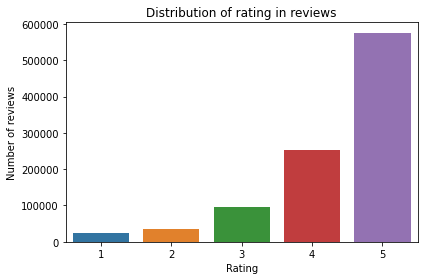

In [10]:
distribution = df['overall'].value_counts(dropna=False)

fig = sns.barplot(distribution.index, distribution)
fig.set(xlabel='Rating', ylabel='Number of reviews', title="Distribution of rating in reviews")
fig.get_figure().tight_layout()
fig.get_figure().savefig("Distributuon_of_rating.png")

# Meta Features

In [12]:
#remove text with images
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]

print(df.count())

df['punctuation'] = df['reviewText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Id                982590
asin              982590
helpful           982590
overall           982590
reviewText        982590
reviewTime        982590
reviewerID        982590
reviewerName      982590
summary           982590
unixReviewTime    982590
punctuation       982590
dtype: int64


Get the number of punctuations in text by rating

Id                962627
asin              962627
helpful           962627
overall           962627
reviewText        962627
reviewTime        962627
reviewerID        962627
reviewerName      962627
summary           962627
unixReviewTime    962627
punctuation       962627
dtype: int64


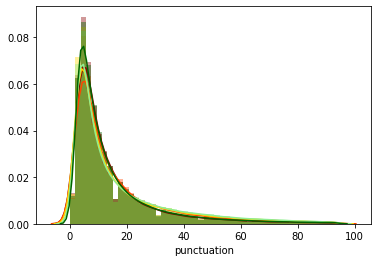

In [14]:
#remove outliers
df_outliers = df[np.abs(df['punctuation']-df['punctuation'].mean())<=(3*df['punctuation'].std())]

rating1 = df_outliers['overall']==1
rating2 = df_outliers['overall']==2
rating3 = df_outliers['overall']==3
rating4 = df_outliers['overall']==4
rating5 = df_outliers['overall']==5

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df_outliers['punctuation'].max())
print(df_outliers.count())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df_outliers.loc[rating1]['punctuation'], label='Rating 1', color='darkred')
sns.distplot(df_outliers.loc[rating2]['punctuation'], label='Rating 2', color='orangered')
sns.distplot(df_outliers.loc[rating3]['punctuation'], label='Rating 3', color='gold')
sns.distplot(df_outliers.loc[rating4]['punctuation'], label='Rating 4', color='lightgreen')
sns.distplot(df_outliers.loc[rating5]['punctuation'], label='Rating 5', color='darkgreen')

Get average word count

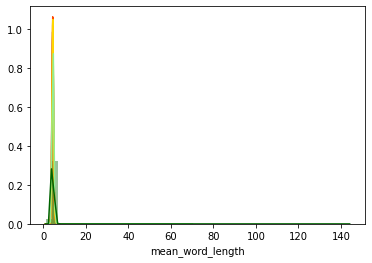

In [16]:
df['mean_word_length'] = df['reviewText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df['punctuation'].max())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

rating1 = df['overall']==1
rating2 = df['overall']==2
rating3 = df['overall']==3
rating4 = df['overall']==4
rating5 = df['overall']==5

sns.distplot(df.loc[rating1]['mean_word_length'], label='Rating 1', color='darkred')
sns.distplot(df.loc[rating2]['mean_word_length'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['mean_word_length'], label='Rating 3', color='gold')
sns.distplot(df.loc[rating4]['mean_word_length'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['mean_word_length'], label='Rating 5', color='darkgreen')

# N-Grams

In [18]:
def generate_ngrams(text, n_gram=1):
    token = text.split()
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [20]:
from collections import defaultdict

rating1_unigrams = defaultdict(int)
rating2_unigrams = defaultdict(int)
rating3_unigrams = defaultdict(int)
rating4_unigrams = defaultdict(int)
rating5_unigrams = defaultdict(int)

Uni-gram

In [22]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review):
        rating1_unigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review):
        rating2_unigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review):
        rating3_unigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review):
        rating4_unigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review):
        rating5_unigrams[word] += 1

Rating 1: 
['the' 'i' 'to' 'and' 'a' 'of' 'this' 'it' 'was' 'is'] [196490 124190 113898 109830 108744  78818  75104  64506  64478  61182]
Rating 2: 
['the' 'i' 'to' 'and' 'a' 'of' 'was' 'it' 'this' 'is'] [383192 210708 205556 201970 196744 147762 123966 116718 110896  99576]
Rating 3: 
['the' 'a' 'and' 'to' 'i' 'of' 'was' 'it' 'is' 'in'] [1143254  663840  650576  617228  590380  457528  357078  338450  321706
  298208]
Rating 4: 
['the' 'and' 'a' 'to' 'i' 'of' 'is' 'in' 'this' 'that'] [3010612 2127056 1900478 1861682 1446700 1299710 1059868  896274  849126
  776932]
Rating 5: 
['the' 'and' 'to' 'a' 'i' 'of' 'is' 'this' 'in' 'that'] [5095302 3960752 3377954 3045432 2913462 2267608 1939720 1918146 1581540
 1316144]


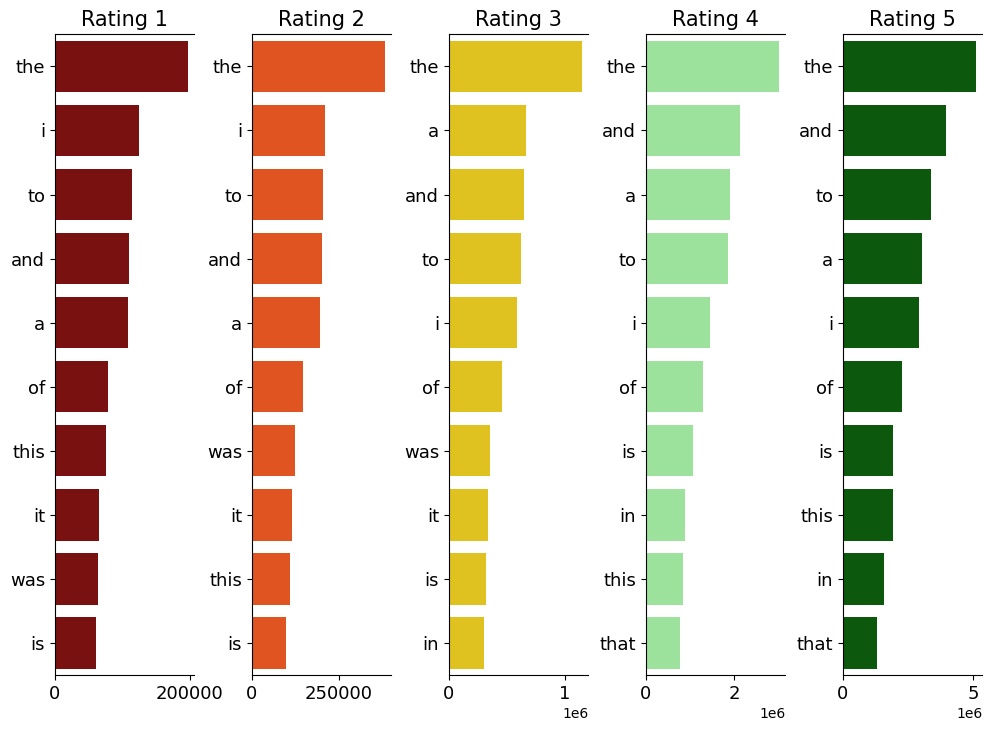

In [24]:
df_rating1_unigrams = pd.DataFrame(sorted(rating1_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_unigrams = pd.DataFrame(sorted(rating2_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_unigrams = pd.DataFrame(sorted(rating3_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_unigrams = pd.DataFrame(sorted(rating4_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_unigrams = pd.DataFrame(sorted(rating5_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(10, 7), dpi=100)
plt.tight_layout()

N = 10 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_unigrams[0].values[:N], df_rating1_unigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_unigrams[0].values[:N], df_rating2_unigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_unigrams[0].values[:N], df_rating3_unigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_unigrams[0].values[:N], df_rating4_unigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_unigrams[0].values[:N], df_rating5_unigrams[1].values[:N])

sns.barplot(y=df_rating1_unigrams[0].values[:N], x=df_rating1_unigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_unigrams[0].values[:N], x=df_rating2_unigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_unigrams[0].values[:N], x=df_rating3_unigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_unigrams[0].values[:N], x=df_rating4_unigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_unigrams[0].values[:N], x=df_rating5_unigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

Bi-gram

In [26]:
rating1_bigrams = defaultdict(int)
rating2_bigrams = defaultdict(int)
rating3_bigrams = defaultdict(int)
rating4_bigrams = defaultdict(int)
rating5_bigrams = defaultdict(int)

In [28]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating1_bigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating2_bigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating3_bigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating4_bigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating5_bigrams[word] += 1

Rating 1: 
['of the' 'this book' 'it was' 'in the' 'to be' 'the author' 'the book'
 'the story' 'i was' 'to the'] [18220 17472 14130 12466  9814  8186  8042  7688  7646  7540]
Rating 2: 
['of the' 'in the' 'it was' 'this book' 'the story' 'to be' 'the book'
 'i was' 'to the' 'and the'] [37996 25500 24846 24302 19494 18240 16618 15362 14628 14374]
Rating 3: 
['of the' 'in the' 'it was' 'the story' 'this book' 'was a' 'is a' 'to be'
 'and the' 'to the'] [115530  82560  77550  61984  60162  56062  55150  48820  44268  43784]
Rating 4: 
['of the' 'in the' 'is a' 'this book' 'it was' 'was a' 'and the' 'to the'
 'the story' 'to be'] [284902 231254 198094 174698 145054 136982 128756 126220 126152 119254]
Rating 5: 
['this book' 'of the' 'in the' 'is a' 'and the' 'and i' 'this is' 'to the'
 'i was' 'it was'] [480818 459422 372820 355808 223792 221614 220006 215724 201378 188290]


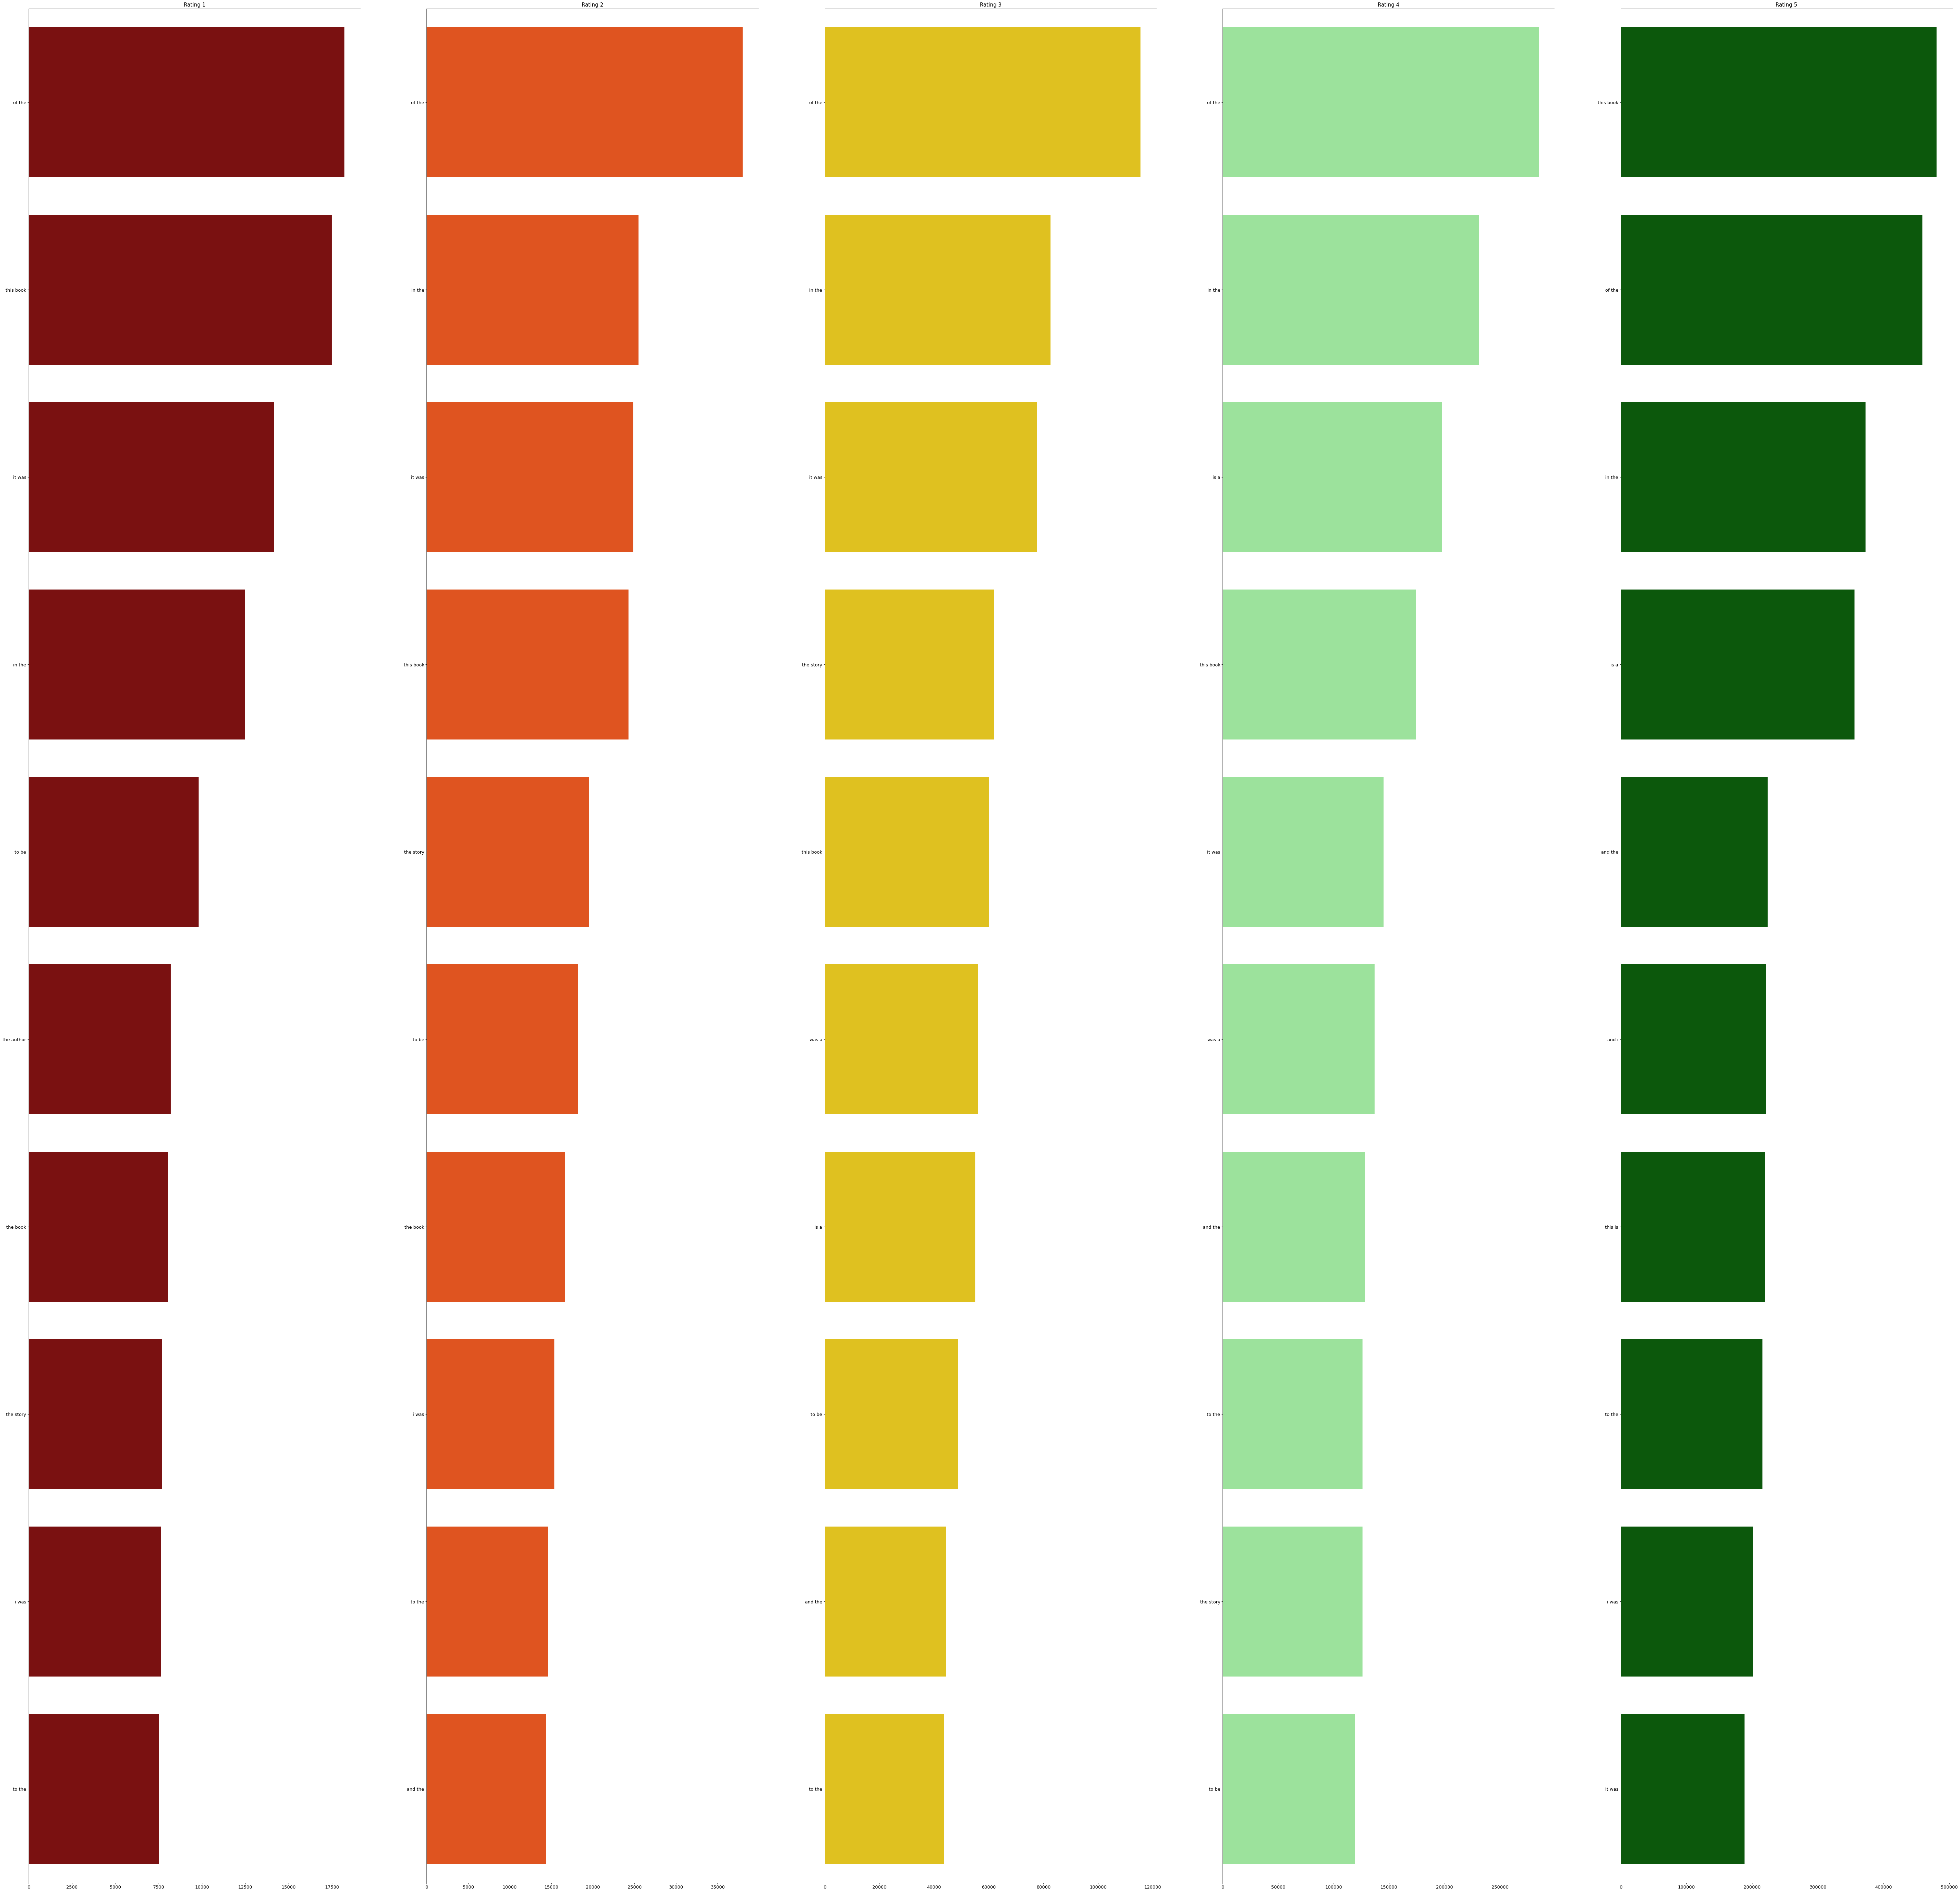

In [35]:
df_rating1_bigrams = pd.DataFrame(sorted(rating1_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_bigrams = pd.DataFrame(sorted(rating2_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_bigrams = pd.DataFrame(sorted(rating3_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_bigrams = pd.DataFrame(sorted(rating4_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_bigrams = pd.DataFrame(sorted(rating5_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5)

N = 10 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_bigrams[0].values[:N], df_rating1_bigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_bigrams[0].values[:N], df_rating2_bigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_bigrams[0].values[:N], df_rating3_bigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_bigrams[0].values[:N], df_rating4_bigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_bigrams[0].values[:N], df_rating5_bigrams[1].values[:N])

sns.barplot(y=df_rating1_bigrams[0].values[:N], x=df_rating1_bigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_bigrams[0].values[:N], x=df_rating2_bigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_bigrams[0].values[:N], x=df_rating3_bigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_bigrams[0].values[:N], x=df_rating4_bigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_bigrams[0].values[:N], x=df_rating5_bigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

In [32]:
rating1_trigrams = defaultdict(int)
rating2_trigrams = defaultdict(int)
rating3_trigrams = defaultdict(int)
rating4_trigrams = defaultdict(int)
rating5_trigrams = defaultdict(int)

In [34]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating1_trigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating2_trigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating3_trigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating4_trigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating5_trigrams[word] += 1

Rating 1: 
['this book was' 'this book is' 'a lot of' 'it was a' 'i did not'
 'of the book' 'to be a' 'one of the' 'this is a' 'a waste of'] [3262 2456 1932 1844 1698 1580 1552 1444 1352 1328]
Rating 2: 
['a lot of' 'this book was' 'of the book' 'it was a' 'could have been'
 'to be a' 'this book is' 'the story was' 'i did not' 'of the story'] [5166 4214 3638 3322 3020 2906 2662 2644 2506 2328]
Rating 3: 
['a lot of' 'it was a' 'this is a' 'this was a' 'this book was'
 'i would have' 'of the book' 'some of the' 'could have been'
 'the story was'] [17600 16030 10688 10194  9970  9762  9054  8612  8574  8556]
Rating 4: 
['this is a' 'a lot of' 'it was a' 'this was a' 'this book is'
 'i really enjoyed' 'for an honest' 'in exchange for' 'this book was'
 'looking forward to'] [39936 38932 33838 31358 22728 22286 22154 20436 20426 19420]
Rating 5: 
['this is a' 'this book is' 'a lot of' "can't wait to" "i can't wait"
 'this book was' 'in love with' 'one of the' "can't wait for"
 'for the next

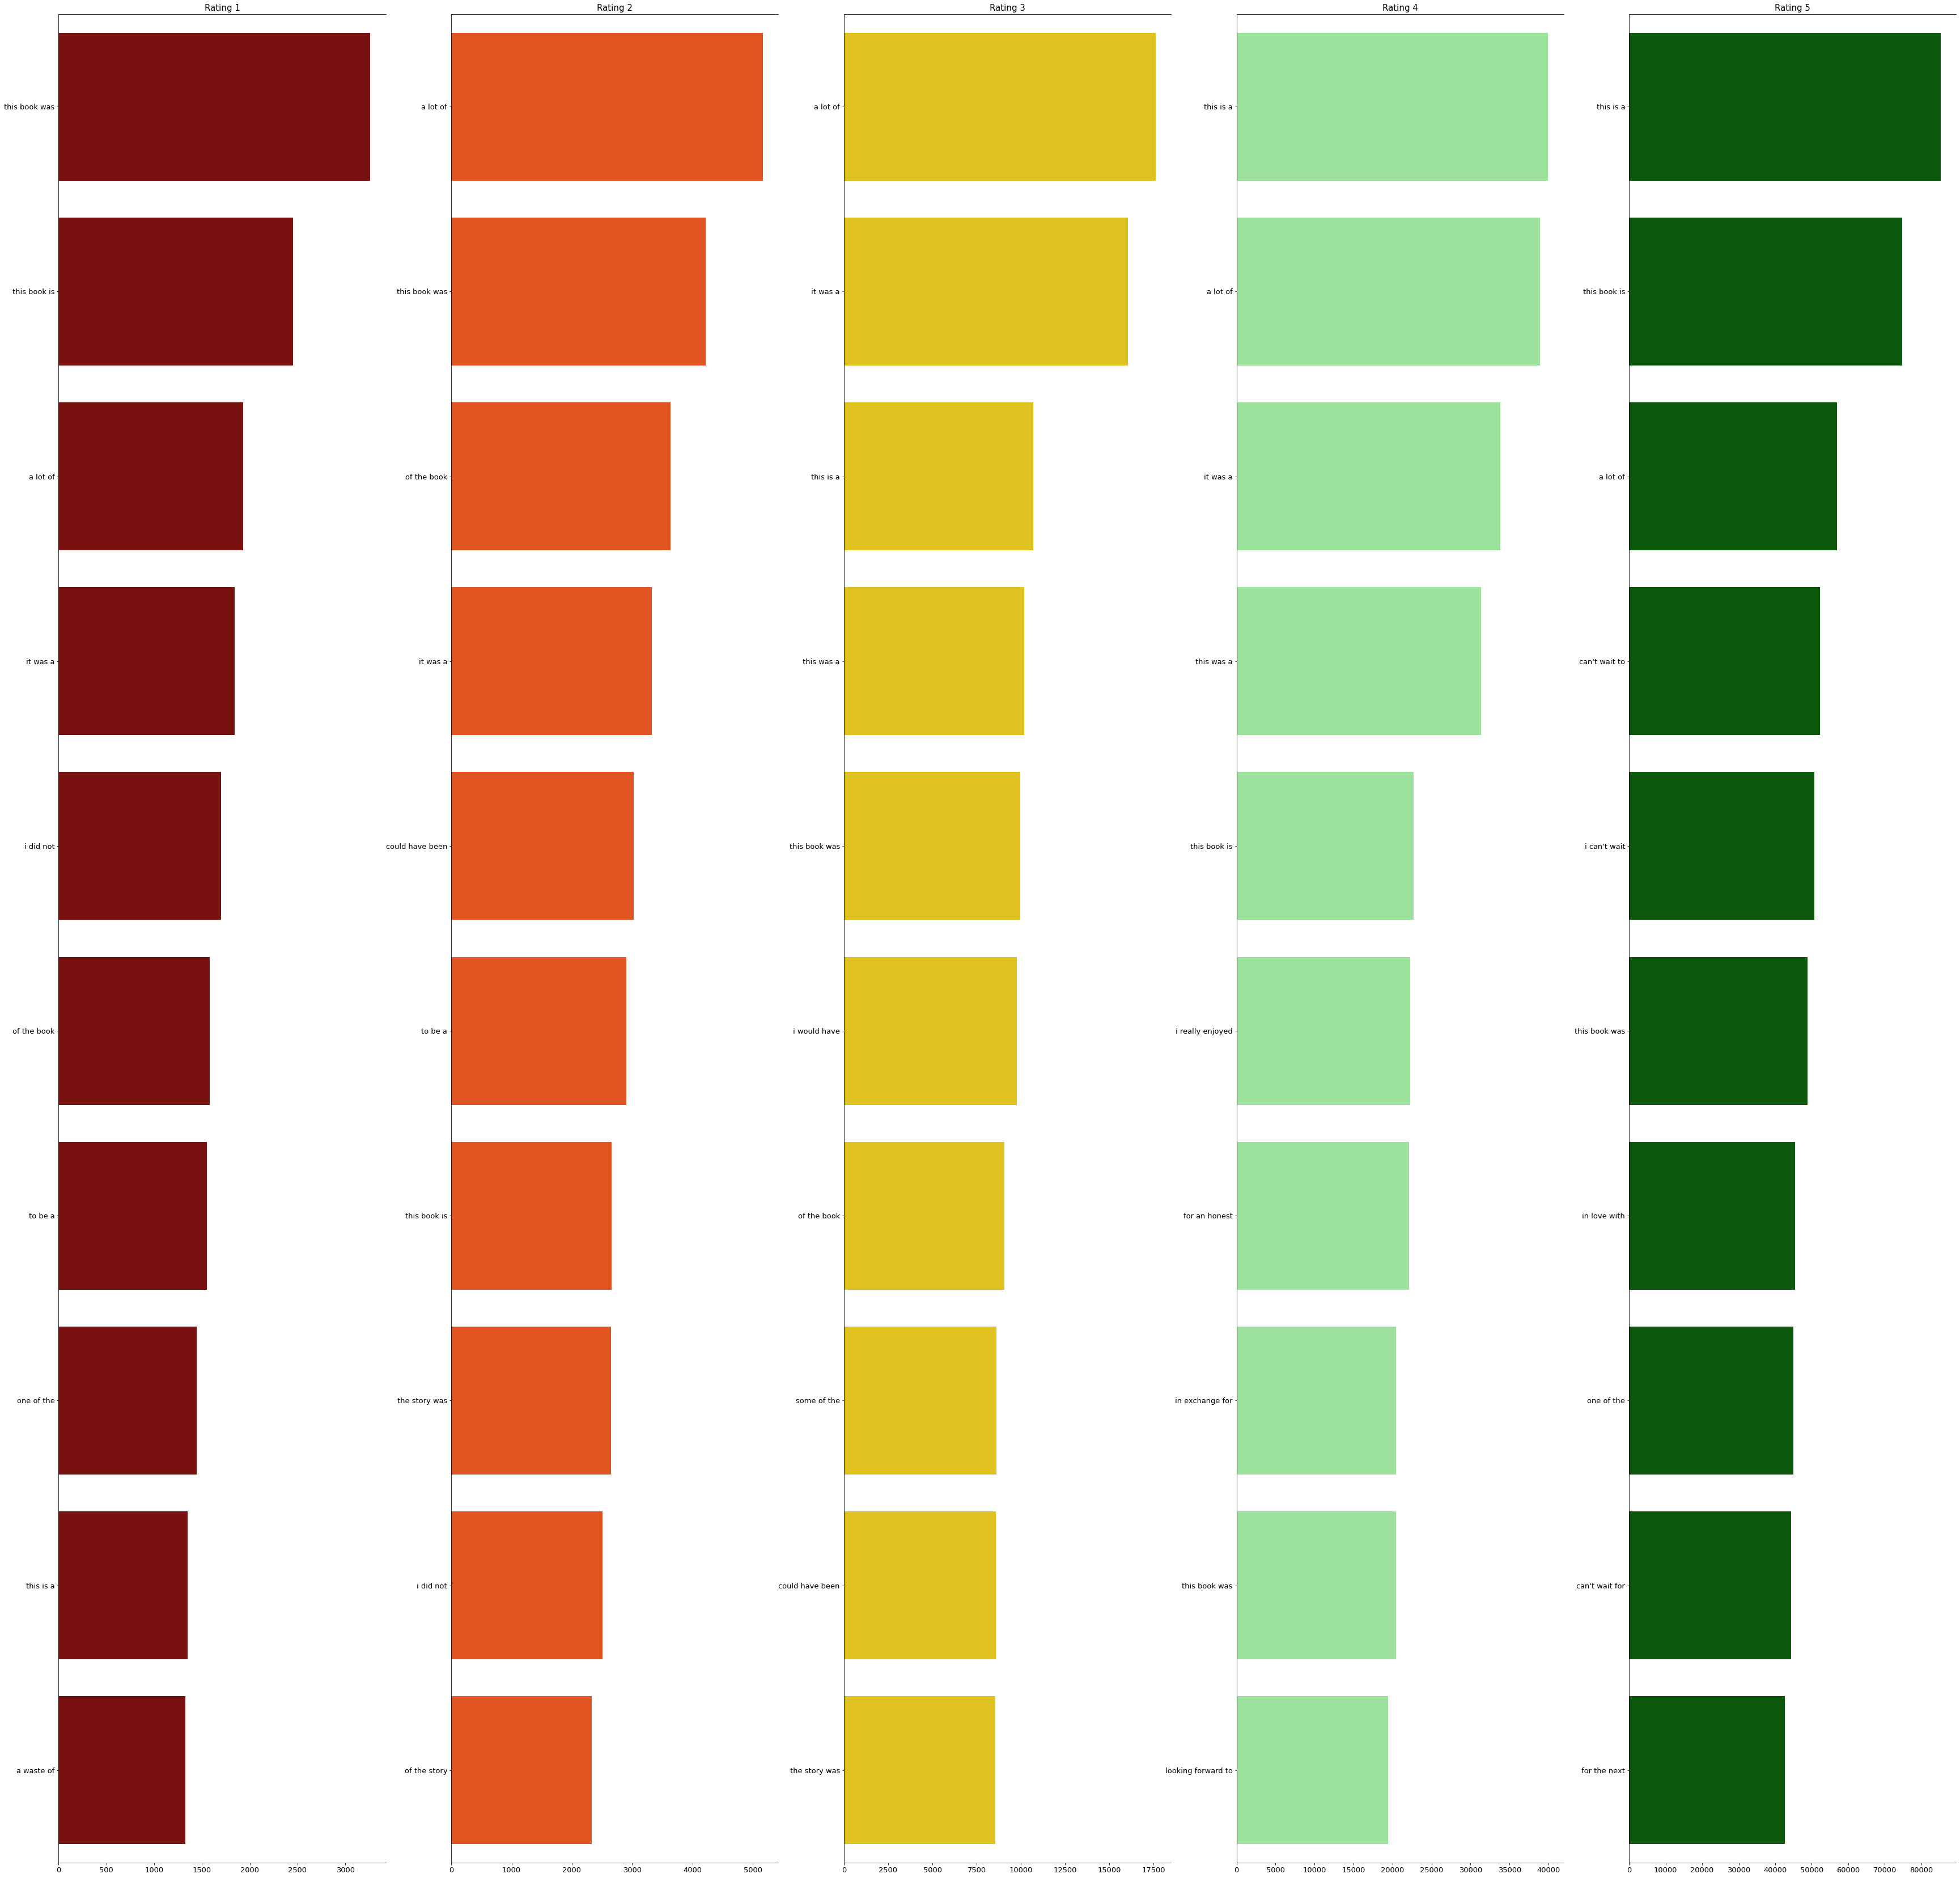

In [41]:
df_rating1_trigrams = pd.DataFrame(sorted(rating1_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_trigrams = pd.DataFrame(sorted(rating2_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_trigrams = pd.DataFrame(sorted(rating3_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_trigrams = pd.DataFrame(sorted(rating4_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_trigrams = pd.DataFrame(sorted(rating5_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(60, 60))

N = 5 #only select top n unigrams

print("Rating 1: ")
print(df_rating1_trigrams[0].values[:N], df_rating1_trigrams[1].values[:N])
print("Rating 2: ")
print(df_rating2_trigrams[0].values[:N], df_rating2_trigrams[1].values[:N])
print("Rating 3: ")
print(df_rating3_trigrams[0].values[:N], df_rating3_trigrams[1].values[:N])
print("Rating 4: ")
print(df_rating4_trigrams[0].values[:N], df_rating4_trigrams[1].values[:N])
print("Rating 5: ")
print(df_rating5_trigrams[0].values[:N], df_rating5_trigrams[1].values[:N])

sns.barplot(y=df_rating1_trigrams[0].values[:N], x=df_rating1_trigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_trigrams[0].values[:N], x=df_rating2_trigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_trigrams[0].values[:N], x=df_rating3_trigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_trigrams[0].values[:N], x=df_rating4_trigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_trigrams[0].values[:N], x=df_rating5_trigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

8